## **Importing Libraries**

In [ ]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
!pip install gradio pandas
!pip install IPython
from IPython.display import Image, display
import gradio as gr
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import SimpleImputer
from scipy.sparse import csr_matrix
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.2/57.2 MB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.4/320.4 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 109.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.4 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## **Loading The Dataset**

In [ ]:
Preprocessed_data = pd.read_csv('Preprocessed_data.csv')

In [ ]:
print("\nInfo of Preprocessed_data:")
Preprocessed_data.info()


Info of Preprocessed_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031175 entries, 0 to 1031174
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   Unnamed: 0           1031175 non-null  int64  
 1   user_id              1031175 non-null  int64  
 2   location             1031175 non-null  object 
 3   age                  1031175 non-null  float64
 4   isbn                 1031175 non-null  object 
 5   rating               1031175 non-null  int64  
 6   book_title           1031175 non-null  object 
 7   book_author          1031174 non-null  object 
 8   year_of_publication  1031175 non-null  float64
 9   publisher            1031175 non-null  object 
 10  img_s                1031175 non-null  object 
 11  img_m                1031175 non-null  object 
 12  img_l                1031175 non-null  object 
 13  Summary              1031175 non-null  object 
 14  Language             1

In [ ]:
print("\nShape of Preprocessed_data:", Preprocessed_data.shape)


Shape of Preprocessed_data: (1031175, 19)


In [ ]:
print("\nHead of Preprocessed_data:")
Preprocessed_data.head()


Head of Preprocessed_data:


,Unnamed: 0,user_id,location,age,isbn,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country
0,0,2,"stockton, california, usa",18.0000,0195153448,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa
1,1,8,"timmins, ontario, canada",34.7439,0002005018,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada
2,2,11400,"ottawa, ontario, canada",49.0000,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada
3,3,11676,"n/a, n/a, n/a",34.7439,0002005018,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN
4,4,41385,"sudbury, ontario, canada",34.7439,0002005018,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## **Encoding The Variables For Better Understanding**

In [ ]:
from sklearn.preprocessing import LabelEncoder
user_encoder = LabelEncoder()
isbn_encoder = LabelEncoder()

In [ ]:
Preprocessed_data['user_id_encoded'] = user_encoder.fit_transform(Preprocessed_data['user_id'])
Preprocessed_data['isbn_encoded'] = isbn_encoder.fit_transform(Preprocessed_data['isbn'])
Preprocessed_data = Preprocessed_data.drop(['user_id', 'isbn'], axis=1)

In [ ]:
Preprocessed_data.head()

,Unnamed: 0,location,age,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,img_l,Summary,Language,Category,city,state,country,user_id_encoded,isbn_encoded
0,0,"stockton, california, usa",18.0000,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa,0,24929
1,1,"timmins, ontario, canada",34.7439,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada,1,73
2,2,"ottawa, ontario, canada",49.0000,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada,3530,73
3,3,"n/a, n/a, n/a",34.7439,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN,3629,73
4,4,"sudbury, ontario, canada",34.7439,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada,13727,73


In [ ]:
unique_user_ids = Preprocessed_data['user_id_encoded'].nunique()
unique_isbns = Preprocessed_data['isbn_encoded'].nunique()

print(f"Number of unique user IDs: {unique_user_ids}")
print(f"Number of unique ISBNs: {unique_isbns}")

Number of unique user IDs: 92107
Number of unique ISBNs: 270170


## **EDA Of Preprocessed Data**

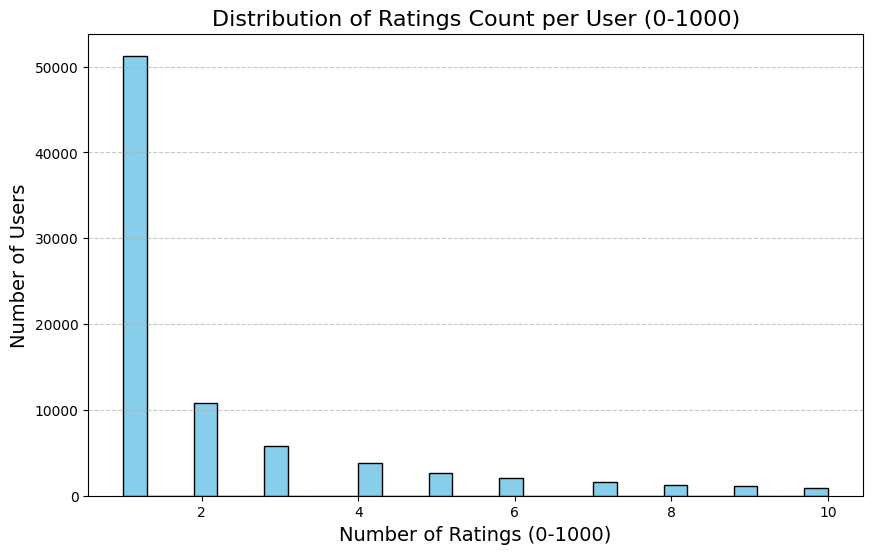

In [ ]:
user_ratings_count = Preprocessed_data.groupby('user_id_encoded')['rating'].count()

filtered_ratings_count = user_ratings_count[user_ratings_count <= 10]

plt.figure(figsize=(10, 6))
plt.hist(filtered_ratings_count, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings Count per User (0-1000)', fontsize=16)
plt.xlabel('Number of Ratings (0-1000)', fontsize=14)
plt.ylabel('Number of Users', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

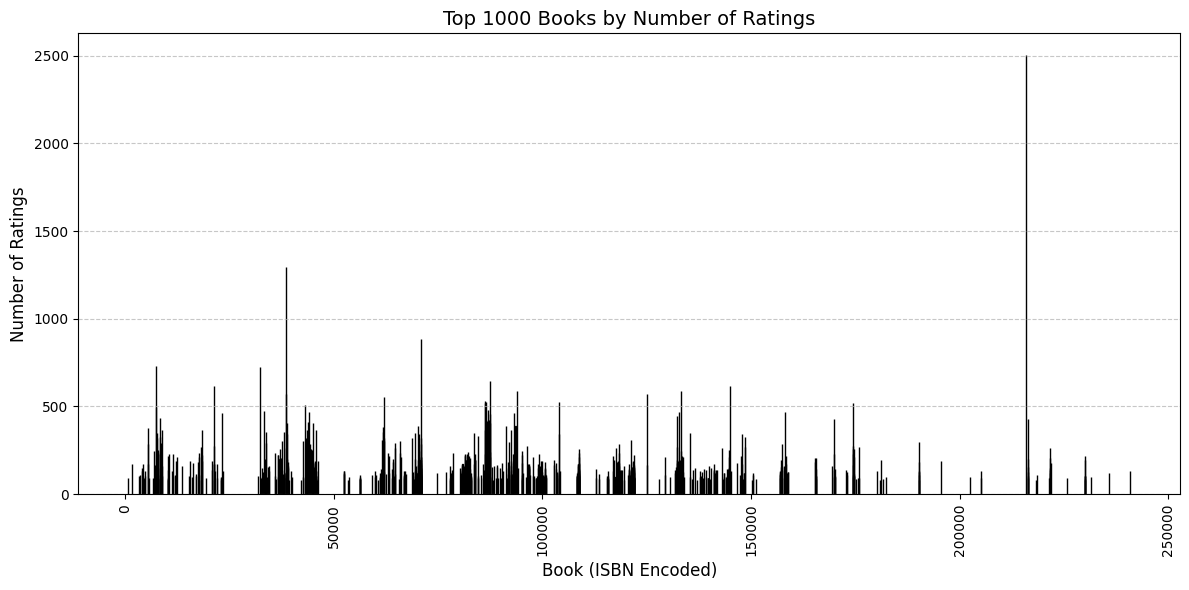

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

book_ratings_count = Preprocessed_data.groupby('isbn_encoded')['rating'].count()

book_ratings_count_df = book_ratings_count.reset_index().rename(columns={'rating': 'num_ratings'})

book_ratings_count_df = book_ratings_count_df.sort_values(by='num_ratings', ascending=False)

top_books_df = book_ratings_count_df.head(1000)

plt.figure(figsize=(12, 6))
plt.bar(top_books_df['isbn_encoded'], top_books_df['num_ratings'], color='skyblue', edgecolor='black')
plt.xlabel('Book (ISBN Encoded)', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.title(f'Top {1000} Books by Number of Ratings', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## **Filtering Out Data For Statistical Significance**

In [ ]:
user_ratings_count = Preprocessed_data.groupby('user_id_encoded')['rating'].count()

users_to_keep = user_ratings_count[user_ratings_count >= 50].index

filtered_Preprocessed_data = Preprocessed_data[Preprocessed_data['user_id_encoded'].isin(users_to_keep)]

book_ratings_count = filtered_Preprocessed_data.groupby('isbn_encoded')['rating'].count()

books_to_keep = book_ratings_count[book_ratings_count >= 50].index

filtered_Preprocessed_data = filtered_Preprocessed_data[filtered_Preprocessed_data['isbn_encoded'].isin(books_to_keep)]

In [ ]:
filtered_Preprocessed_data.shape

(98794, 19)

## **Data Processing**

In [ ]:
filtered_Preprocessed_data['rating'] = pd.to_numeric(filtered_Preprocessed_data['rating'], errors='coerce')

book_ratings = filtered_Preprocessed_data.groupby('isbn_encoded').agg(
    avg_rating=('rating', 'mean'),
    num_ratings=('rating', 'count')
)

Final_data = filtered_Preprocessed_data.merge(book_ratings, on='isbn_encoded', how='left')

In [ ]:
print("\nInfo of Final_data:")
Final_data.info()


Info of Final_data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98794 entries, 0 to 98793
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           98794 non-null  int64  
 1   location             98794 non-null  object 
 2   age                  98794 non-null  float64
 3   rating               98794 non-null  int64  
 4   book_title           98794 non-null  object 
 5   book_author          98794 non-null  object 
 6   year_of_publication  98794 non-null  float64
 7   publisher            98794 non-null  object 
 8   img_s                98794 non-null  object 
 9   img_m                98794 non-null  object 
 10  img_l                98794 non-null  object 
 11  Summary              98794 non-null  object 
 12  Language             98794 non-null  object 
 13  Category             98794 non-null  object 
 14  city                 97687 non-null  object 
 15  state          

In [ ]:
print("\nShape of Final_data:", Final_data.shape)


Shape of Final_data: (98794, 21)


In [ ]:
print("\nHead of Final_data:")
Final_data.head()


Head of Final_data:


,Unnamed: 0,location,age,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,...,Summary,Language,Category,city,state,country,user_id_encoded,isbn_encoded,avg_rating,num_ratings
0,99,"arden hills, minnesota, usa",34.7439,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,...,"A suicidal billionaire, a burnt-out Washington...",en,['Fiction'],arden hills,minnesota,usa,83,87249,1.957944,214
1,101,"richland, washington, usa",25.0000,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,...,"A suicidal billionaire, a burnt-out Washington...",en,['Fiction'],richland,washington,usa,919,87249,1.957944,214
2,103,"knoxville, tennessee, usa",29.0000,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,...,"A suicidal billionaire, a burnt-out Washington...",en,['Fiction'],knoxville,tennessee,usa,1033,87249,1.957944,214
3,106,"sunnyvale, california, usa",49.0000,9,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,...,"A suicidal billionaire, a burnt-out Washington...",en,['Fiction'],sunnyvale,california,usa,2316,87249,1.957944,214
4,109,"o`fallon, missouri, usa",34.7439,0,The Testament,John Grisham,1999.0,Dell,http://images.amazon.com/images/P/0440234743.0...,http://images.amazon.com/images/P/0440234743.0...,...,"A suicidal billionaire, a burnt-out Washington...",en,['Fiction'],o`fallon,missouri,usa,3041,87249,1.957944,214


In [ ]:
Final_User = Final_data.drop(['Unnamed: 0','location', 'img_s', 'img_m', 'img_l'], axis=1)

In [ ]:
Final_User.shape

(98794, 16)

In [ ]:
print(tabulate(Final_User.head(), headers='keys', tablefmt='psql'))

+----+---------+----------+---------------+---------------+-----------------------+-------------+-----------------------------------------------------------------------+------------+-------------+-------------+------------+-----------+-------------------+----------------+--------------+---------------+
|    |     age |   rating | book_title    | book_author   |   year_of_publication | publisher   | Summary                                                               | Language   | Category    | city        | state      | country   |   user_id_encoded |   isbn_encoded |   avg_rating |   num_ratings |
|----+---------+----------+---------------+---------------+-----------------------+-------------+-----------------------------------------------------------------------+------------+-------------+-------------+------------+-----------+-------------------+----------------+--------------+---------------|
|  0 | 34.7439 |        0 | The Testament | John Grisham  |                  1999 | Dell

In [ ]:
Final_Book = Final_User.drop(['rating','user_id_encoded', 'age', 'city', 'state', 'country'], axis=1)
Final_Book = Final_Book.drop_duplicates(subset=['isbn_encoded'])
Final_Book = Final_Book.set_index('isbn_encoded')

In [ ]:
Final_Book.shape

(1078, 9)

In [ ]:
print(tabulate(Final_Book.head(), headers='keys', tablefmt='psql'))

+----------------+--------------------------------------+------------------+-----------------------+------------------+------------------------------------------------------------------------+------------+-------------+--------------+---------------+
|   isbn_encoded | book_title                           | book_author      |   year_of_publication | publisher        | Summary                                                                | Language   | Category    |   avg_rating |   num_ratings |
|----------------+--------------------------------------+------------------+-----------------------+------------------+------------------------------------------------------------------------+------------+-------------+--------------+---------------|
|          87249 | The Testament                        | John Grisham     |                  1999 | Dell             | A suicidal billionaire, a burnt-out Washington litigator, and a woman  | en         | ['Fiction'] |     1.95794  |           21

## **EDA Of Final Data**

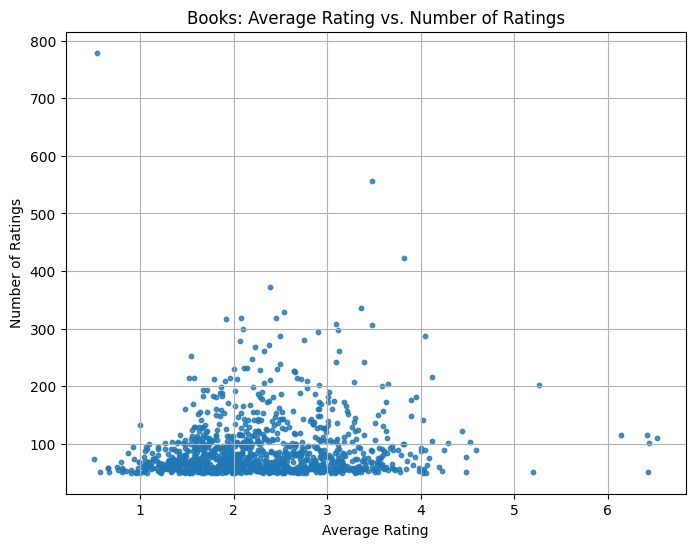

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(Final_Book['avg_rating'], Final_Book['num_ratings'], alpha=0.8, s=10)
plt.xlabel('Average Rating')
plt.ylabel('Number of Ratings')
plt.title('Books: Average Rating vs. Number of Ratings')
plt.grid(True)
plt.show()

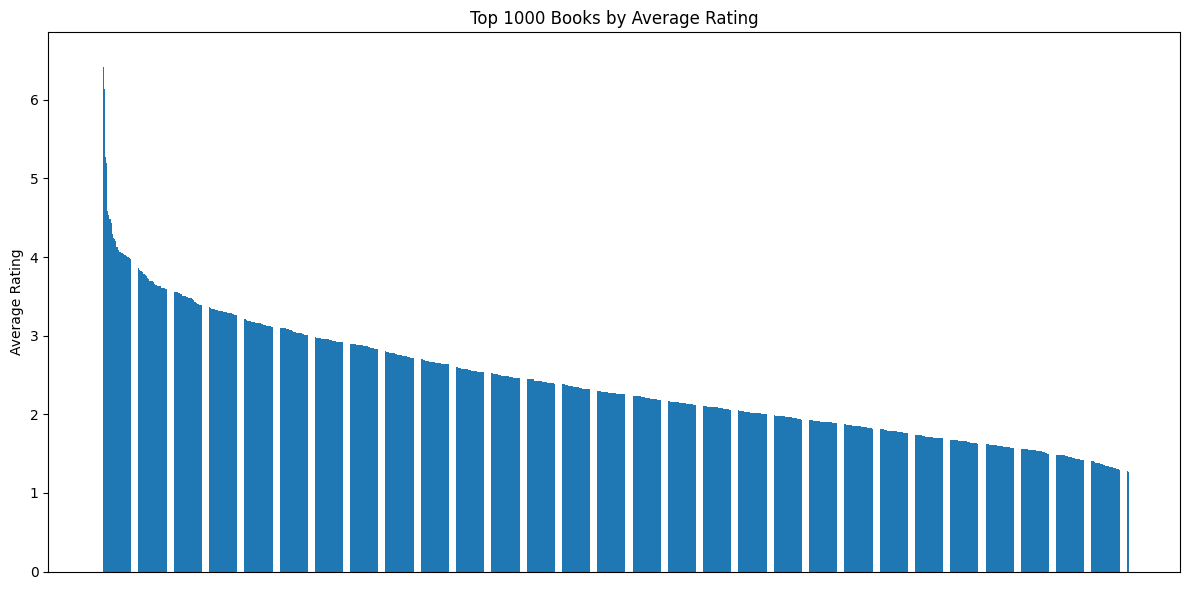

In [ ]:
top_1000_avg_rating = Final_Book.sort_values(by='avg_rating', ascending=False).head(1000)

plt.figure(figsize=(12, 6))
plt.bar(top_1000_avg_rating.index.astype(str), top_1000_avg_rating['avg_rating'])
plt.ylabel('Average Rating')
plt.title('Top 1000 Books by Average Rating')
plt.xticks([])
plt.tight_layout()
plt.show()


Year of Publication - Descriptive Statistics:
 count    1078.000000
mean     1997.026902
std         5.543465
min      1959.000000
25%      1994.000000
50%      1998.000000
75%      2001.000000
max      2004.000000
Name: year_of_publication, dtype: float64


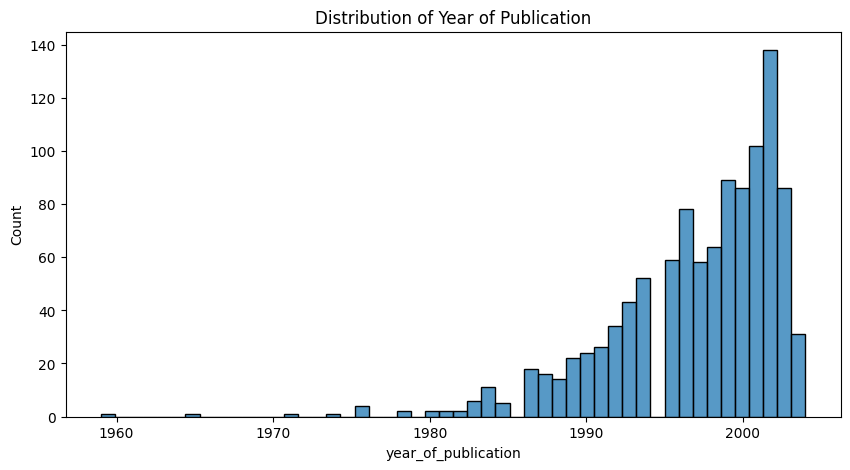

In [ ]:
print("\nYear of Publication - Descriptive Statistics:\n", Final_Book['year_of_publication'].describe())
plt.figure(figsize=(10, 5))
sns.histplot(Final_Book['year_of_publication'], bins=50)
plt.title('Distribution of Year of Publication')
plt.show()

In [ ]:
# publisher:
print("\nUnique Publishers:", Final_Book['publisher'].nunique())
print("Most Frequent Publishers:\n", Final_Book['publisher'].value_counts().head(200))


Unique Publishers: 140
Most Frequent Publishers:
 publisher
Berkley Publishing Group    92
Ballantine Books            76
Pocket                      67
Warner Books                63
Bantam                      50
                            ..
Villard Books                1
Farrar Straus & Giroux       1
Dial Books                   1
Mira Books                   1
Xlibris Corporation          1
Name: count, Length: 140, dtype: int64



Average Rating - Descriptive Statistics:
 count    1078.000000
mean        2.303505
std         0.814003
min         0.506849
25%         1.708523
50%         2.194052
75%         2.827287
max         6.531532
Name: avg_rating, dtype: float64


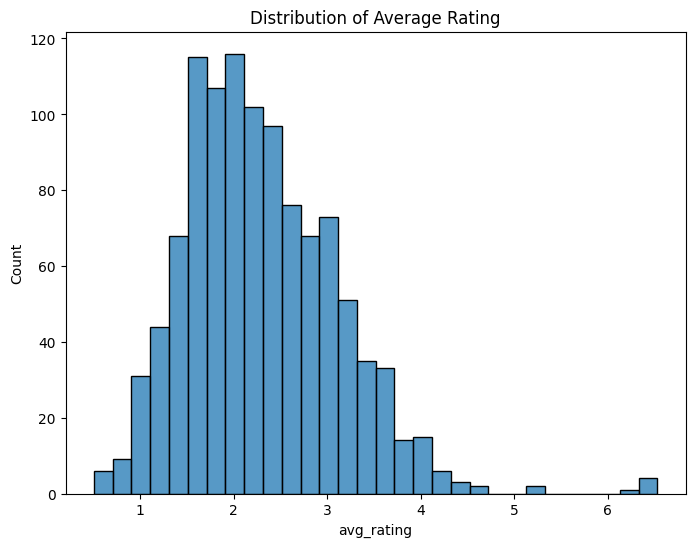

In [ ]:
print("\nAverage Rating - Descriptive Statistics:\n", Final_Book['avg_rating'].describe())
plt.figure(figsize=(8, 6))
sns.histplot(Final_Book['avg_rating'], bins=30)
plt.title('Distribution of Average Rating')
plt.show()


Number of Ratings - Descriptive Statistics:
 count    1078.000000
mean       91.645640
std        55.472417
min        50.000000
25%        59.000000
50%        72.500000
75%       103.000000
max       779.000000
Name: num_ratings, dtype: float64


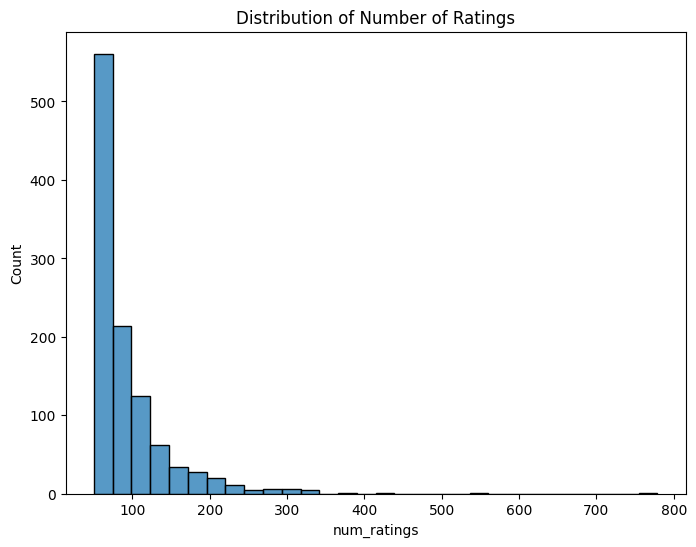

In [ ]:
print("\nNumber of Ratings - Descriptive Statistics:\n", Final_Book['num_ratings'].describe())
plt.figure(figsize=(8, 6))
sns.histplot(Final_Book['num_ratings'], bins=30)
plt.title('Distribution of Number of Ratings')
plt.show()

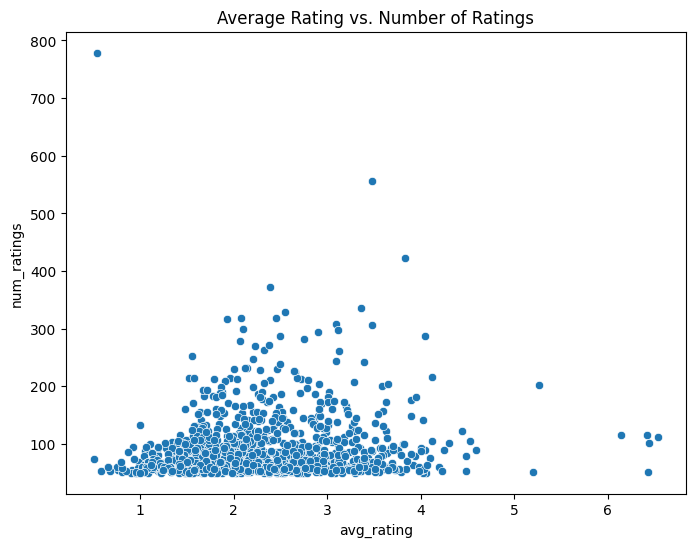

Correlation: 0.11222127371111774


In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='avg_rating', y='num_ratings', data=Final_Book)
plt.title('Average Rating vs. Number of Ratings')
plt.show()
print("Correlation:", Final_Book['avg_rating'].corr(Final_Book['num_ratings']))

## **Calculating Weighted Rating For Rating & Popularity Based Recommendation**

In [ ]:
V = Final_Book['num_ratings']
R = Final_Book['avg_rating']
C = Final_Book['avg_rating'].mean()
m = Final_Book['num_ratings'].quantile(0.7)

In [ ]:
Final_Book['weighted_rating'] = (V/(V+m) * R) + (m/(m+V) * C)

In [ ]:
scaler = MinMaxScaler()

weighted_rating_values = Final_Book['weighted_rating'].values.reshape(-1, 1)

scaled_ratings = scaler.fit_transform(weighted_rating_values)

Final_Book['scaled_rating'] = scaled_ratings

In [ ]:
Final_Book_Ranking = Final_Book.sort_values(by='scaled_rating', ascending=False)

In [ ]:
Final_Book_Ranking

,book_title,book_author,year_of_publication,publisher,Summary,Language,Category,avg_rating,num_ratings,weighted_rating,scaled_rating
isbn_encoded,,,,,,,,,,,
83633,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999.0,Scholastic,"In Harry Potter and the Chamber of Secrets, th...",en,['Juvenile Fiction'],6.531532,111,4.581714,1.000000
83854,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999.0,Scholastic,During his third year at Hogwarts School for w...,en,['Juvenile Fiction'],6.417391,115,4.556348,0.993407
125021,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998.0,Scholastic,Rescued from the outrageous neglect of his aun...,en,['Juvenile Fiction'],6.435644,101,4.432821,0.961300
83875,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000.0,Scholastic,The fourth title in the continuing saga includ...,en,['Juvenile Fiction'],6.137931,116,4.411531,0.955766
84475,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003.0,Scholastic,Collects the complete series that relates the ...,en,['Juvenile Fiction'],5.267327,202,4.319303,0.931794
...,...,...,...,...,...,...,...,...,...,...,...
81392,Tom Clancy's Op-Center (Tom Clancy's Op Center...,Tom Clancy,1995.0,Berkley Publishing Group,When three nuclear missiles are stolen from th...,en,['Fiction'],0.870588,85,1.626850,0.231975
137863,While My Pretty One Sleeps,Mary Higgins Clark,1990.0,Pocket,"A stunning tale of murder, glamour and romance...",en,['Fiction'],0.925532,94,1.618164,0.229717
17672,Songs in Ordinary Time (Oprah's Book Club (Pap...,Mary McGarry Morris,1996.0,Penguin Books,A novel set in a small town in Vermont in 1960...,en,['Fiction'],1.000000,133,1.543127,0.210213


In [ ]:
import numpy as np
Final_Book_Ranking['Category'] = Final_Book_Ranking['Category'].replace('9', np.nan)
Final_Book_Ranking['Language'] = Final_Book_Ranking['Language'].replace('9', np.nan)

In [ ]:
Final_Book_Ranking.columns

Index(['book_title', 'book_author', 'year_of_publication', 'publisher',
       'Summary', 'Language', 'Category', 'avg_rating', 'num_ratings',
       'weighted_rating', 'scaled_rating'],
      dtype='object')

In [ ]:
Final_Book.columns

Index(['book_title', 'book_author', 'year_of_publication', 'publisher',
       'Summary', 'Language', 'Category', 'avg_rating', 'num_ratings',
       'weighted_rating', 'scaled_rating'],
      dtype='object')

In [ ]:
Final_Book_Ranking.head(20)

,book_title,book_author,year_of_publication,publisher,Summary,Language,Category,avg_rating,num_ratings,weighted_rating,scaled_rating
isbn_encoded,,,,,,,,,,,
83633,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,1999.0,Scholastic,"In Harry Potter and the Chamber of Secrets, th...",en,['Juvenile Fiction'],6.531532,111,4.581714,1.000000
83854,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,1999.0,Scholastic,During his third year at Hogwarts School for w...,en,['Juvenile Fiction'],6.417391,115,4.556348,0.993407
125021,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,1998.0,Scholastic,Rescued from the outrageous neglect of his aun...,en,['Juvenile Fiction'],6.435644,101,4.432821,0.961300
83875,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000.0,Scholastic,The fourth title in the continuing saga includ...,en,['Juvenile Fiction'],6.137931,116,4.411531,0.955766
84475,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003.0,Scholastic,Collects the complete series that relates the ...,en,['Juvenile Fiction'],5.267327,202,4.319303,0.931794
198070,Griffin & Sabine: An Extraordinary Correspondence,Nick Bantock,1991.0,Chronicle Books,"Don&#39;t miss The Pharos Gate, the final volu...",en,['Fiction'],6.431373,51,3.745432,0.782634
125022,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,1999.0,Arthur A. Levine Books,Rescued from the outrageous neglect of his aun...,en,['Juvenile Fiction'],4.045296,287,3.612128,0.747986
91217,To Kill a Mockingbird,Harper Lee,1988.0,Little Brown & Company,The unforgettable novel of a childhood in a sl...,en,['Fiction'],4.125000,216,3.568595,0.736671
70803,The Da Vinci Code,Dan Brown,2003.0,Doubleday,Harvard symbologist Robert Langdon and French ...,en,['Fiction'],3.827423,423,3.547940,0.731303


In [ ]:
Final_User.to_csv('Final_User.csv', index=False)

In [ ]:
Final_Book_Ranking.to_csv('Final_Book_Ranking.csv', index=False)

In [ ]:

most_reviewed_books = Final_Book.sort_values(by='num_ratings', ascending=False)

print(most_reviewed_books.head(10))

                                                     book_title  \
isbn_encoded                                                      
215968                                              Wild Animus   
38572                                 The Lovely Bones: A Novel   
70803                                         The Da Vinci Code   
7345            Divine Secrets of the Ya-Ya Sisterhood: A Novel   
32372                       The Red Tent (Bestselling Backlist)   
86342                                                  The Firm   
86356                                            A Time to Kill   
145052                                   Snow Falling on Cedars   
86463                                         The Pelican Brief   
93856         Where the Heart Is (Oprah's Book Club (Paperba...   

                 book_author  year_of_publication  \
isbn_encoded                                        
215968          Rich Shapero               2004.0   
38572           Alice Sebold        

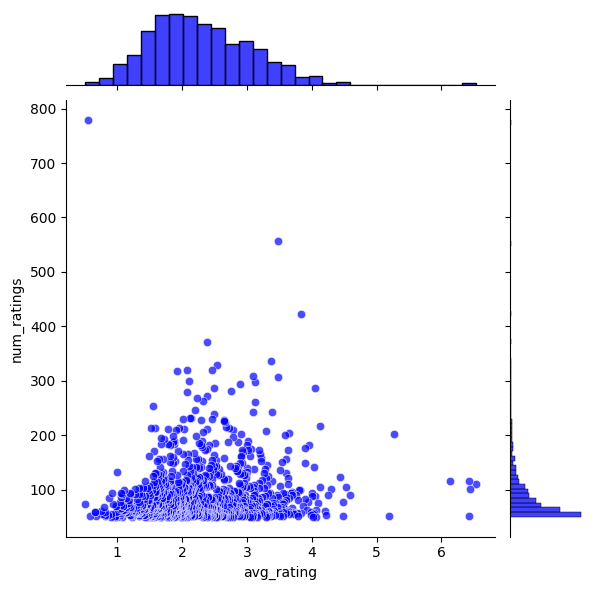

In [ ]:
sns.jointplot(x='avg_rating', y='num_ratings', data=Final_Book_Ranking, alpha=0.7, color='b')

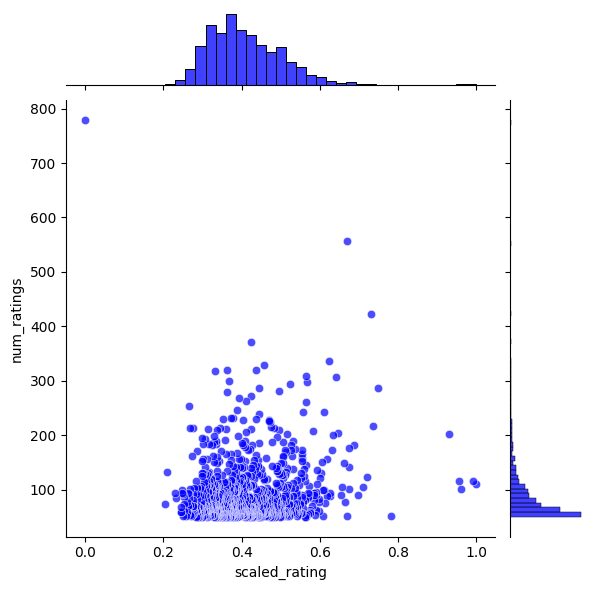

In [ ]:
sns.jointplot(x='scaled_rating', y='num_ratings', data=Final_Book_Ranking, alpha=0.7, color='b')

## **Collaborative Filtering**

## **Recommendation Based On Pearsonian Correlation**

In [ ]:
user_isbn_matrix = pd.pivot_table(Final_User, values='rating', index='user_id_encoded', columns='book_title')

In [ ]:
user_isbn_matrix.head()

book_title,1984,1st to Die: A Novel,2010: Odyssey Two,204 Rosewood Lane,2nd Chance,4 Blondes,A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,A Bend in the Road,A Case of Need,...,Winter Solstice,Wish You Well,Without Remorse,"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
user_id_encoded,,,,,,,,,,,,,,,,,,,,,
83,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
161,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
user_rating_df = Final_User[['user_id_encoded', 'book_title', 'rating']]
user_rating_df

,user_id_encoded,book_title,rating
0,83,The Testament,0
1,919,The Testament,0
2,1033,The Testament,0
3,2316,The Testament,9
4,3041,The Testament,0
...,...,...,...
98789,82825,No One to Trust,0
98790,83585,No One to Trust,8
98791,85462,No One to Trust,0
98792,86586,No One to Trust,0


In [ ]:
Book_User_ratings = user_isbn_matrix['2nd Chance']
Book_User_ratings.head()

,2nd Chance
user_id_encoded,
83,0.0
87,NaN
161,NaN
189,9.0
193,NaN


In [ ]:
similar_to_Book = user_isbn_matrix.corrwith(Book_User_ratings)
similar_to_Book.head()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,0
book_title,
1984,-0.270776
1st to Die: A Novel,0.283146
2010: Odyssey Two,NaN
204 Rosewood Lane,0.217038
2nd Chance,1.000000


In [ ]:
corr_Book = pd.DataFrame(similar_to_Book, columns=['Correlation'])
corr_Book.dropna(inplace=True)
corr_Book.head()

,Correlation
book_title,
1984,-0.270776
1st to Die: A Novel,0.283146
204 Rosewood Lane,0.217038
2nd Chance,1.000000
A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),0.819311


In [ ]:
corr_Book.sort_values('Correlation', ascending=False).head(10)

,Correlation
book_title,
Shogun,1.000000
Eden Close,1.000000
A Cry In The Night,1.000000
Notes from a Small Island,1.000000
2nd Chance,1.000000
Firestarter,1.000000
Waiting to Exhale,1.000000
Summer Island,0.995795
The Scarlet Letter,0.992414


In [ ]:
corr_Book = pd.DataFrame(similar_to_Book, columns=['Correlation'], index=similar_to_Book.index)
corr_Book.dropna(inplace=True)

corr_Book = corr_Book.reset_index()
Final_Book_reset = Final_Book.reset_index()

corr_Book = pd.merge(corr_Book, Final_Book_reset[['book_title', 'num_ratings']], on='book_title', how='left')

corr_Book = corr_Book.set_index('book_title')

filtered_corr_Book = corr_Book[corr_Book['num_ratings'] >= 100]

In [ ]:
filtered_corr_Book.head()

,Correlation,num_ratings
book_title,,
1984,-0.270776,101
1st to Die: A Novel,0.283146,210
2nd Chance,1.000000,141
A Bend in the Road,0.355293,126
A Case of Need,0.628373,112


In [ ]:
filtered_corr_Book_sorted = filtered_corr_Book.sort_values(by='Correlation', ascending=False)

print(filtered_corr_Book_sorted)

                                                    Correlation  num_ratings
book_title                                                                  
2nd Chance                                             1.000000          141
Pay It Forward                                         0.929211          100
The Two Towers (The Lord of the Rings, Part 2)         0.713300          106
\O\" Is for Outlaw"                                    0.704124          104
Tribulation Force: The Continuing Drama of Thos...     0.664162          115
...                                                         ...          ...
1984                                                  -0.270776          101
The Thorn Birds                                       -0.288661          142
Presumed Innocent                                     -0.295386          127
Sophie's World: A Novel About the History of Ph...    -0.400029          105
Dude, Where's My Country?                             -0.488329          105

In [ ]:
def display_book_image(book_title, image_sizes=['s', 'm', 'l']):
    """Displays the image of a given book title in all sizes (s, m, l).

    Args:
        book_title (str): The title of the book.
        image_sizes (list, optional): List of image sizes to display. Defaults to ['s', 'm', 'l'].
    """
    try:
        book_row = Preprocessed_data[Preprocessed_data['book_title'] == book_title].iloc[0]

        for size in image_sizes:
            image_column = 'img_' + size
            image_url = book_row[image_column]
            print(f"Displaying image size: {size}")
            display(Image(url=image_url))

    except IndexError:
        print(f"Book '{book_title}' not found in the dataset.")

book_title = input("Enter the book title: ")
display_book_image(book_title)

Enter the book title: 2nd Chance
Displaying image size: s


Displaying image size: m


Displaying image size: l


In [ ]:
user_isbn_matrix = pd.pivot_table(Final_User, values='rating', index='user_id_encoded', columns='book_title')

def get_book_recommendations(book_title, user_isbn_matrix, Final_Book, Preprocessed_data, min_ratings=100, top_n=10):
    Book_User_ratings = user_isbn_matrix[book_title]

    similar_to_Book = user_isbn_matrix.corrwith(Book_User_ratings)
    corr_Book = pd.DataFrame(similar_to_Book, columns=['Correlation'])
    corr_Book.dropna(inplace=True)

    corr_Book = corr_Book.reset_index()
    Final_Book_reset = Final_Book.reset_index()
    corr_Book = pd.merge(corr_Book, Final_Book_reset[['book_title', 'num_ratings']], on='book_title', how='left')

    corr_Book = corr_Book.set_index('book_title')
    filtered_corr_Book = corr_Book[corr_Book['num_ratings'] >= min_ratings]

    filtered_corr_Book_sorted = filtered_corr_Book.sort_values(by='Correlation', ascending=False).head(top_n)

    recommendations = filtered_corr_Book_sorted.index.tolist()
    print(f"Top {top_n} book recommendations based on '{book_title}':")

    for idx, recommended_book in enumerate(recommendations, 1):
        print(f"{idx}. {recommended_book} - Correlation: {filtered_corr_Book_sorted.loc[recommended_book, 'Correlation']:.4f}")
        display_book_image(recommended_book, Preprocessed_data, image_sizes=['s'])

def display_book_image(book_title, Preprocessed_data, image_sizes=['s']):
    """Displays the small image of a given book title."""
    try:
        book_row = Preprocessed_data[Preprocessed_data['book_title'] == book_title].iloc[0]

        for size in image_sizes:
            image_column = 'img_' + size
            image_url = book_row[image_column]
            print(f"Displaying image size: {size}")
            display(Image(url=image_url))

    except IndexError:
        print(f"Book '{book_title}' not found in the dataset.")

book_title = input("Enter the book title: ")
get_book_recommendations(book_title, user_isbn_matrix, Final_Book, Preprocessed_data)

Enter the book title: 2nd Chance


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Top 10 book recommendations based on '2nd Chance':
1. 2nd Chance - Correlation: 1.0000
Displaying image size: s


2. Pay It Forward - Correlation: 0.9292
Displaying image size: s


3. The Two Towers (The Lord of the Rings, Part 2) - Correlation: 0.7133
Displaying image size: s


4. \O\" Is for Outlaw" - Correlation: 0.7041
Displaying image size: s


5. Tribulation Force: The Continuing Drama of Those Left Behind (Left Behind No. 2) - Correlation: 0.6642
Displaying image size: s


6. Night - Correlation: 0.6620
Displaying image size: s


7. A Case of Need - Correlation: 0.6284
Displaying image size: s


8. Point of Origin - Correlation: 0.6163
Displaying image size: s


9. Night Sins - Correlation: 0.6162
Displaying image size: s


10. E Is for Evidence: A Kinsey Millhone Mystery (Kinsey Millhone Mysteries (Paperback)) - Correlation: 0.6085
Displaying image size: s


In [ ]:
def recommend_books(book_title):
    user_isbn_matrix = pd.pivot_table(Final_User, values='rating', index='user_id_encoded', columns='book_title')

    if book_title not in user_isbn_matrix.columns:
        return ["Invalid book title. Please select a book from the dropdown.", "", "", "", "", "", "", "", "", ""]

    Book_User_ratings = user_isbn_matrix[book_title]
    similar_to_Book = user_isbn_matrix.corrwith(Book_User_ratings)
    corr_Book = pd.DataFrame(similar_to_Book, columns=['Correlation'])
    corr_Book.dropna(inplace=True)

    corr_Book = pd.DataFrame(similar_to_Book, columns=['Correlation'], index=similar_to_Book.index)
    corr_Book.dropna(inplace=True)
    corr_Book = corr_Book.reset_index()
    Final_Book_reset = Final_Book.reset_index()

    corr_Book = pd.merge(corr_Book, Final_Book_reset[['book_title', 'num_ratings']], on='book_title', how='left')

    corr_Book = corr_Book.set_index('book_title')

    filtered_corr_Book = corr_Book[corr_Book['num_ratings'] >= 100]
    filtered_corr_Book_sorted = filtered_corr_Book.sort_values(by='Correlation', ascending=False)

    top_recommendations = filtered_corr_Book_sorted.index.tolist()
    if book_title in top_recommendations:
        top_recommendations.remove(book_title)
    top_recommendations = top_recommendations[:10]

    top_recommendations.extend([''] * (10 - len(top_recommendations)))

    return top_recommendations

book_titles = Final_Book_Ranking.sort_values(by='num_ratings', ascending=False)['book_title'].unique().tolist()

iface = gr.Interface(
    fn=recommend_books,
   inputs=[
        gr.Dropdown(choices=book_titles, label="Select a book:")
    ],
    outputs=[
        gr.Textbox(label="Book 1"),
        gr.Textbox(label="Book 2"),
        gr.Textbox(label="Book 3"),
        gr.Textbox(label="Book 4"),
        gr.Textbox(label="Book 5"),
        gr.Textbox(label="Book 6"),
        gr.Textbox(label="Book 7"),
        gr.Textbox(label="Book 8"),
        gr.Textbox(label="Book 9"),
        gr.Textbox(label="Book 10"),
    ],
    title="Book Recommendation System (Collaborative Filtering)",
    description="Get personalized book recommendations based on your reading history.",
    article="Created By Santanu",
    theme="glass",
)
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://86853eb44d1fd0b7ee.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## **Recommendation Based On Nearest Neighbours**

In [ ]:
user_isbn = pd.pivot_table(Final_User, values='rating', index='book_title', columns='user_id_encoded').fillna(0)

In [ ]:
user_isbn.head(20)

user_id_encoded,83,87,161,189,193,224,265,282,312,370,...,91770,91784,91810,91847,91850,91870,91953,92020,92028,92100
book_title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A 2nd Helping of Chicken Soup for the Soul (Chicken Soup for the Soul Series (Paper)),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Beautiful Mind: The Life of Mathematical Genius and Nobel Laureate John Nash,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
user_isbn.shape

(1014, 2949)

In [ ]:
user_isbn_matrix = csr_matrix(user_isbn.values)

In [ ]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(user_isbn_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [ ]:
query_index = np.random.choice(user_isbn.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(user_isbn.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)

793


In [ ]:
user_isbn.head()

user_id_encoded,83,87,161,189,193,224,265,282,312,370,...,91770,91784,91810,91847,91850,91870,91953,92020,92028,92100
book_title,,,,,,,,,,,,,,,,,,,,,
1984,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010: Odyssey Two,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
204 Rosewood Lane,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(user_isbn.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, user_isbn.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The House on Mango Street (Vintage Contemporaries):

1: Bastard Out of Carolina, with distance of 0.8053167196938961:
2: The Temple of My Familiar, with distance of 0.8066731307899634:
3: Pigs in Heaven, with distance of 0.8137674574822007:
4: The Hot Zone, with distance of 0.8156862556410509:
5: The Stone Diaries, with distance of 0.8168653079668668:


In [ ]:
user_isbn = pd.pivot_table(Final_User, values='rating', index='book_title', columns='user_id_encoded').fillna(0)
user_isbn_matrix = csr_matrix(user_isbn.values)

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(user_isbn_matrix)

def recommend_books_and_display_images(query_book_title, n_neighbors=6, image_sizes=['s']):
    """
    Recommends books using k-NN and displays their images.

    Args:
        query_book_title (str): The title of the book to base recommendations on.
        n_neighbors (int, optional): Number of recommendations to fetch. Defaults to 11.
        image_sizes (list, optional): List of image sizes to display (e.g., ['s', 'm', 'l']). Defaults to ['s'].
    """
    if query_book_title not in user_isbn.index:
        print(f"Book '{query_book_title}' not found in the dataset.")
        return

    query_index = user_isbn.index.get_loc(query_book_title)

    distances, indices = model_knn.kneighbors(user_isbn.iloc[query_index, :].values.reshape(1, -1), n_neighbors=n_neighbors)

    print(f"Recommendations for '{query_book_title}':\n")

    for i in range(1, len(distances.flatten())):
        recommended_book = user_isbn.index[indices.flatten()[i]]
        print(f"{i}. {recommended_book} (Distance: {distances.flatten()[i]:.4f})")

        try:
            book_row = Preprocessed_data[Preprocessed_data['book_title'] == recommended_book].iloc[0]
            for size in image_sizes:
                image_column = f'img_{size}'
                image_url = book_row.get(image_column, None)
                if image_url:
                    print(f"Displaying {size} image for '{recommended_book}':")
                    display(Image(url=image_url))
                else:
                    print(f"No {size} image available for '{recommended_book}'.")
        except IndexError:
            print(f"Image data not found for '{recommended_book}'.")

query_book_title = input("Enter the book title for recommendations: ")
recommend_books_and_display_images(query_book_title)

Enter the book title for recommendations: 
Book '' not found in the dataset.


In [ ]:
def recommend_books_knn(book_title):
    """Recommends books based on k-Nearest Neighbors.

    Args:
        book_title (str): The title of the book to base recommendations on.

    Returns:
        list: A list of recommended book titles.
    """

    user_isbn = pd.pivot_table(Final_User, values='rating', index='book_title', columns='user_id_encoded').fillna(0)
    user_isbn_matrix = csr_matrix(user_isbn.values)

    model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
    model_knn.fit(user_isbn_matrix)

    try:
        book_index = user_isbn.index.get_loc(book_title)
    except KeyError:
        return ["Invalid book title. Please select a book from the dropdown.", "", "", "", "", "", "", "", "", ""]

    distances, indices = model_knn.kneighbors(user_isbn.iloc[book_index, :].values.reshape(1, -1), n_neighbors=11)

    recommendations = []
    for i in range(1, len(distances.flatten())):
        recommendations.append(user_isbn.index[indices.flatten()[i]])

    recommendations.extend([''] * (10 - len(recommendations)))

    return recommendations

book_titles = Final_Book_Ranking.sort_values(by='num_ratings', ascending=False)['book_title'].unique().tolist()

iface = gr.Interface(
    fn=recommend_books_knn,
    inputs=[
        gr.Dropdown(choices=book_titles, label="Select a book:")
    ],
    outputs=[
        gr.Textbox(label="Book 1"),
        gr.Textbox(label="Book 2"),
        gr.Textbox(label="Book 3"),
        gr.Textbox(label="Book 4"),
        gr.Textbox(label="Book 5"),
        gr.Textbox(label="Book 6"),
        gr.Textbox(label="Book 7"),
        gr.Textbox(label="Book 8"),
        gr.Textbox(label="Book 9"),
        gr.Textbox(label="Book 10"),
    ],
    title="Book Recommendation System (k-Nearest Neighbors)",
    description="Get personalized book recommendations using k-Nearest Neighbors algorithm.",
    article="Created By Santanu",
    theme="glass",
)
iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d2430f5ca8b74acd20.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## **Content Based Recommendation**

In [ ]:
Preprocessed_data['rating'] = pd.to_numeric(Preprocessed_data['rating'], errors='coerce')

book_ratings = Preprocessed_data.groupby('isbn_encoded').agg(
    avg_rating=('rating', 'mean'),
    num_ratings=('rating', 'count')
)

Final_data = Preprocessed_data.merge(book_ratings, on='isbn_encoded', how='left')

In [ ]:
Final_data.head()

,Unnamed: 0,location,age,rating,book_title,book_author,year_of_publication,publisher,img_s,img_m,...,Summary,Language,Category,city,state,country,user_id_encoded,isbn_encoded,avg_rating,num_ratings
0,0,"stockton, california, usa",18.0000,0,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,...,Provides an introduction to classical myths pl...,en,['Social Science'],stockton,california,usa,0,24929,0.000000,1
1,1,"timmins, ontario, canada",34.7439,5,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],timmins,ontario,canada,1,73,4.928571,14
2,2,"ottawa, ontario, canada",49.0000,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],ottawa,ontario,canada,3530,73,4.928571,14
3,3,"n/a, n/a, n/a",34.7439,8,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],NaN,NaN,NaN,3629,73,4.928571,14
4,4,"sudbury, ontario, canada",34.7439,0,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,...,"In a small town in Canada, Clara Callan reluct...",en,['Actresses'],sudbury,ontario,canada,13727,73,4.928571,14


In [ ]:
Final_data.shape

(1031175, 21)

In [ ]:
Final_data = Final_data[~Final_data['Summary'].isnull()]
Final_data = Final_data[Final_data['Summary'] != '9']
Final_data.drop_duplicates(subset=['Summary'], keep='first', inplace=True)

In [ ]:
Final_data.shape

(136910, 21)

In [ ]:
filtered_data = Final_data[Final_data['num_ratings'] > 5]

In [ ]:
filtered_preprocessed_data = filtered_data.drop_duplicates(subset=['book_title'], keep='first')

In [ ]:
Content_Based_Data = filtered_preprocessed_data[['book_title', 'Summary', 'Category']].drop_duplicates(subset=['book_title'])

In [ ]:
Content_Based_Data.head()

,book_title,Summary,Category
1,Clara Callan,"In a small town in Canada, Clara Callan reluct...",['Actresses']
18,Flu: The Story of the Great Influenza Pandemic...,"Describes the great flu epidemic of 1918, an o...",['Medical']
30,The Kitchen God's Wife,A Chinese immigrant who is convinced she is dy...,['Fiction']
73,Nights Below Station Street,Another story based in the fictional rural tow...,['Fiction']
98,The Testament,"A suicidal billionaire, a burnt-out Washington...",['Fiction']


In [ ]:
Content_Based_Data.shape

(19153, 3)

In [ ]:
stemmer = SnowballStemmer("english")
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'<.*?>', '', text)
    text = re.sub(r'\W', ' ', text)
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

    return text

In [ ]:
Content_Based_Data['clean_summary'] = Content_Based_Data['Summary'].apply(clean_text)

In [ ]:
Content_Based_Data[['book_title', 'Summary', 'clean_summary']]

,book_title,Summary,clean_summary
1,Clara Callan,"In a small town in Canada, Clara Callan reluct...",small town canada clara callan reluct take lea...
18,Flu: The Story of the Great Influenza Pandemic...,"Describes the great flu epidemic of 1918, an o...",describ great flu epidem 1918 outbreak kill fo...
30,The Kitchen God's Wife,A Chinese immigrant who is convinced she is dy...,chine immigr convinc die threaten celebr chine...
73,Nights Below Station Street,Another story based in the fictional rural tow...,anoth stori base fiction rural town miramichi
98,The Testament,"A suicidal billionaire, a burnt-out Washington...",suicid billionair burnt washington litig woman...
...,...,...,...
970788,Aloha: Four Romances at a Hawaiian Hideaway,Four Romances at a Hawaiian Hideaway.,four romanc hawaiian hideaway
975927,"Rites Of Love (Harlequin Romance, No 3120)",Rites Of Love by Rebecca Winters released on F...,rite love rebecca winter releas feb 22 1991 av...
980825,The Courage to be Rich: Creating a Life of Mat...,Explores the necessities of life beyond financ...,explor necess life beyond financi secur show m...
991282,Force Of Nature (The Westmoreland Diaries) (Si...,Force Of Nature by Peggy Webb released on Mar ...,forc natur peggi webb releas mar 25 2002 avail...


In [ ]:
tfv = TfidfVectorizer(min_df=3, max_features=None, strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 3), stop_words='english')

In [ ]:
tfv_matrix = tfv.fit_transform(Content_Based_Data['clean_summary'])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(tfv_matrix, tfv_matrix)

In [ ]:
def give_rec(title, cos_sim=cos_sim):
    idx = Content_Based_Data.index[Content_Based_Data['book_title'] == title]

    if idx.empty:
        print(f"Book title '{title}' not found in the dataset.")
        return []

    idx = Content_Based_Data.index.get_loc(idx[0])
    sig_scores = list(enumerate(cos_sim[idx]))
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)
    sig_scores = sig_scores[1:11]
    book_indices = [i[0] for i in sig_scores]

    input_book_category = Content_Based_Data['Category'].iloc[idx]
    print(f"Input Book Category: {input_book_category}")

    recommended_books = Content_Based_Data[['book_title', 'Category']].iloc[book_indices]
    print("Recommended Books:")
    for index, row in recommended_books.iterrows():
        print(f"Title: {row['book_title']}, Category: {row['Category']}")

    return recommended_books


In [ ]:
give_rec('The Haunted Cabin Mystery #20 (The Boxcar Chilrdren)')

Book title 'The Haunted Cabin Mystery #20 (The Boxcar Chilrdren)' not found in the dataset.


[]

In [ ]:
def give_rec_for_gradio(selected_book_title):
    recommendations = give_rec(selected_book_title)
    if recommendations.empty:
        return "Book title not found in the dataset."
    else:
        top_10_recommendations = recommendations.head(10)
        input_book_category = recommendations['Category'].iloc[0]

        outputs = []
        for index, row in top_10_recommendations.iterrows():
            outputs.append(f"{row['book_title']} (Category: {row['Category']})")

        outputs += [""] * (10 - len(outputs))
        outputs.insert(0, f"Input Book Category: {input_book_category}")

        return outputs

all_book_titles = Content_Based_Data['book_title'].unique().tolist()

output_slots = [
    gr.Textbox(label="Input Book Category"),
    gr.Textbox(label="Recommendation 1"),
    gr.Textbox(label="Recommendation 2"),
    gr.Textbox(label="Recommendation 3"),
    gr.Textbox(label="Recommendation 4"),
    gr.Textbox(label="Recommendation 5"),
    gr.Textbox(label="Recommendation 6"),
    gr.Textbox(label="Recommendation 7"),
    gr.Textbox(label="Recommendation 8"),
    gr.Textbox(label="Recommendation 9"),
    gr.Textbox(label="Recommendation 10")
]

iface = gr.Interface(
    fn=give_rec_for_gradio,
    inputs=gr.Dropdown(choices=all_book_titles, label="Select a Book Title"),
    outputs=output_slots,
    title="Book Recommendation System (Content-Based)",
    description="Get personalized book recommendations using Content Based algorithm.",
    article="Created By Santanu",
    theme="glass",
)

iface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7038a8d432d52258db.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


## **Hybrid Model**

In [ ]:
def hybrid_recommend_books(book_title):
    """
    Hybrid recommendation system combining Collaborative Filtering (Correlation),
    k-Nearest Neighbors (kNN), and Content-Based recommendations.

    Args:
        book_title (str): The title of the book to base recommendations on.

    Returns:
        list: A combined list of unique recommended book titles.
    """
    # Get recommendations from each model
    corr_recommendations = recommend_books(book_title)
    knn_recommendations = recommend_books_knn(book_title)

    content_results = give_rec(book_title)
    if isinstance(content_results, list):
        content_recommendations = [book['book_title'] for book in content_results]
    else:
        content_recommendations = []

    # Combine all recommendations into a single list
    all_recommendations = corr_recommendations + knn_recommendations + content_recommendations

    # Remove duplicates while preserving order
    seen = set()
    unique_recommendations = []
    for book in all_recommendations:
        if book not in seen and book != "":  # Exclude empty strings
            seen.add(book)
            unique_recommendations.append(book)

    # Return the top 10 unique recommendations
    return unique_recommendations[:10]

# Example usage
hybrid_recommendations = hybrid_recommend_books("Clara Callan")
print("Hybrid Recommendations:", hybrid_recommendations)


Input Book Category: ['Actresses']
Recommended Books:
Title: Bluebeards Egg, Category: ['Canada']
Title: To Marry the Duke, Category: ['Fiction']
Title: Too Close to the Falls: A Memoir, Category: ['Biography & Autobiography']
Title: Too Close to the Falls, Category: ['History']
Title: Conflicts of Interest, Category: ['Fiction']
Title: Nora, Nora: A Novel, Category: ['Fiction']
Title: Tommyknockers, Category: ['Horror tales']
Title: Der Grobe Gatsby/the Great Gatsby, Category: ['Fiction']
Title: Small - Town Girl, Category: ['Fiction']
Title: Tirra Lirra by the River, Category: ['Fiction']
Hybrid Recommendations: ['Invalid book title. Please select a book from the dropdown.']
